In [5]:
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat", skip=3)

In [6]:
kings

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [7]:
kingstimeseries <- ts(kings)

In [8]:
kingstimeseries

Time Series:
Start = 1 
End = 42 
Frequency = 1 
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [9]:
births <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")

In [10]:
birthstimeseries <- ts(births, frequency = 12, start = c(1946,1))
birthstimeseries

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1946 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
1947 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824 23.105 23.110
1948 21.937 20.035 23.590 21.672 22.222 22.123 23.950 23.504 22.238 23.142
1949 21.548 20.000 22.424 20.615 21.761 22.874 24.104 23.748 23.262 22.907
1950 22.604 20.894 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252
1951 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
1952 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816 25.210 25.199
1953 24.364 22.644 25.565 24.062 25.431 24.635 27.009 26.606 26.268 26.462
1954 24.657 23.304 26.982 26.199 27.210 26.122 26.706 26.878 26.152 26.379
1955 24.990 24.239 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784
1956 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
1957 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141 29.048 28.484
1958 27.132 24.924 28.963

In [11]:
souvenir <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")

In [12]:
souvenirtimseries <- ts(souvenir, frequency=12, start=c(1987,1))

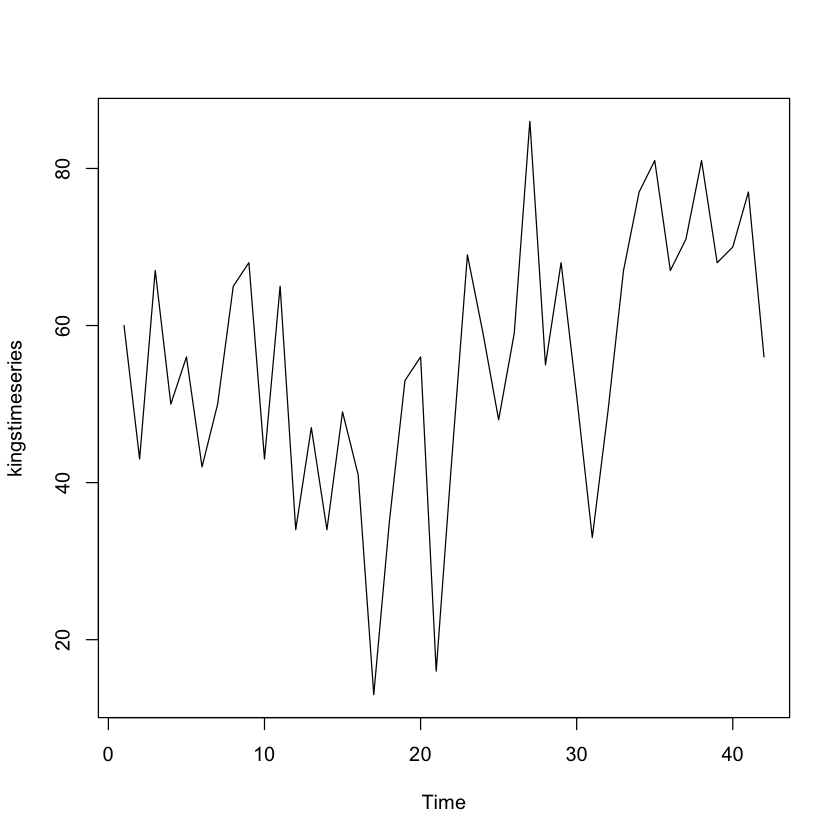

In [13]:
plot.ts(kingstimeseries)

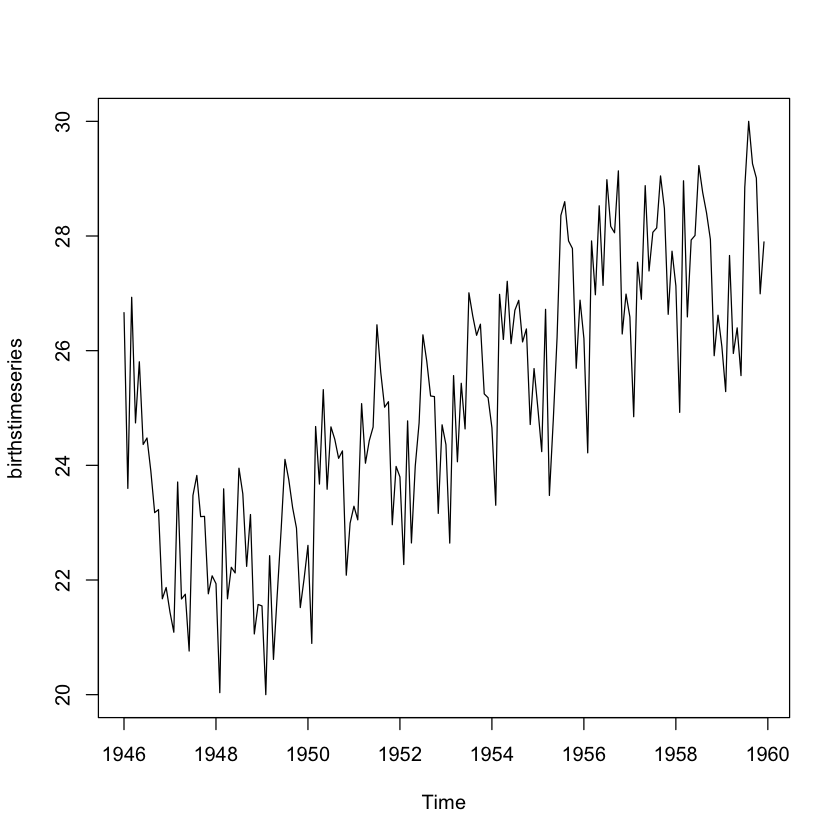

In [14]:
plot.ts(birthstimeseries)

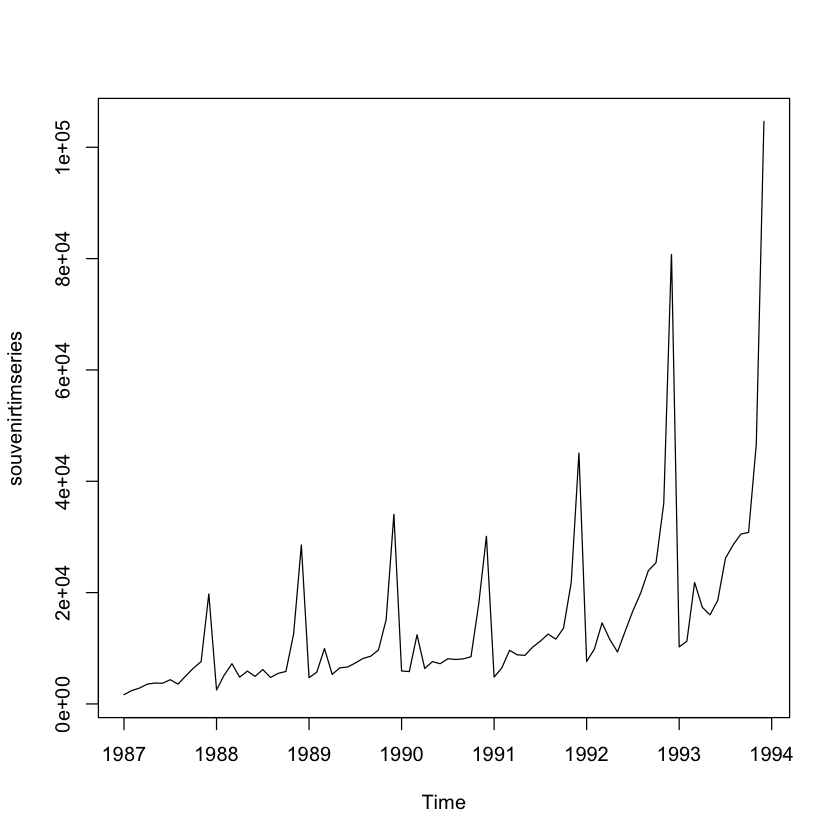

In [15]:
plot.ts(souvenirtimseries)

In [16]:
logsouvenirtimeseries <- log(souvenirtimseries)

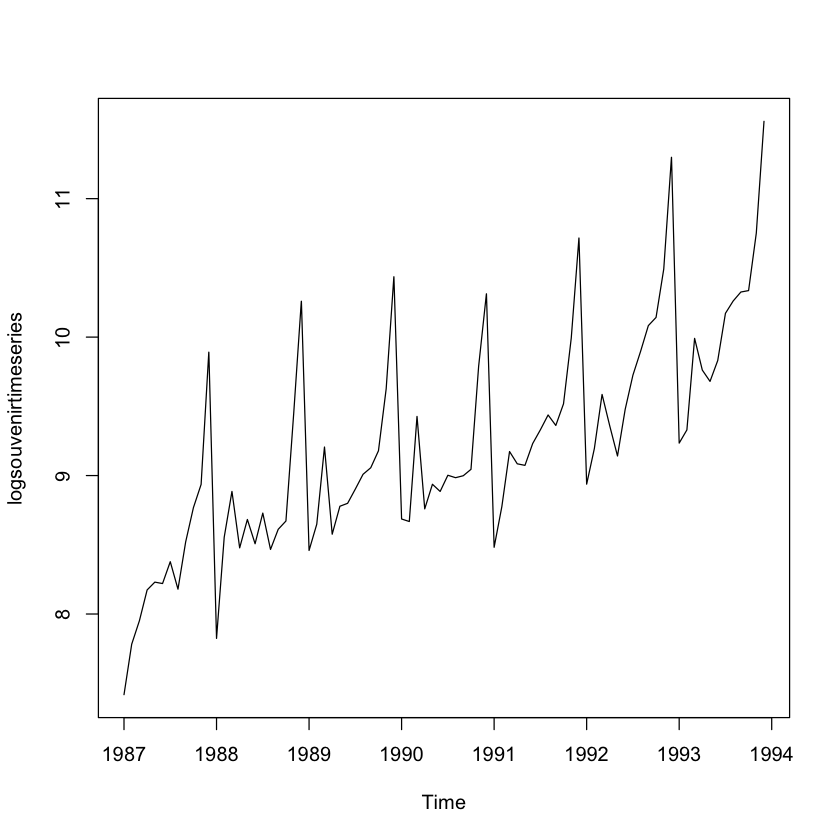

In [17]:
plot.ts(logsouvenirtimeseries)

#### Decomposing Time Series

In [18]:
library(TTR)

In [19]:
kingstimeseriesSMA3 <- SMA(kingstimeseries,n=3)

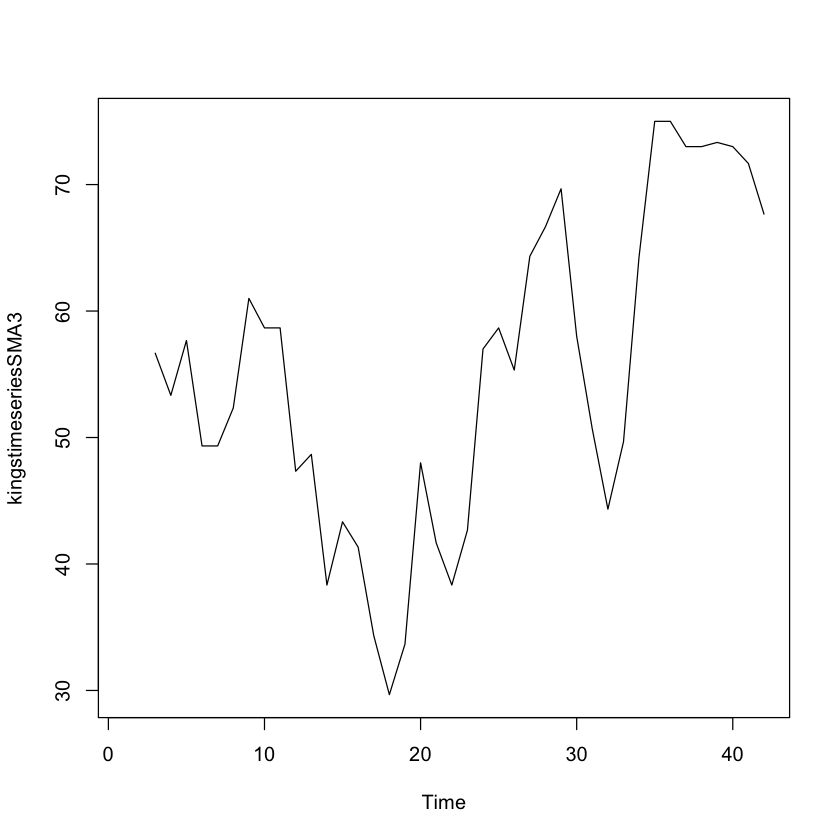

In [20]:
plot.ts(kingstimeseriesSMA3)

In [21]:
na.omit(kingstimeseriesSMA3)

Time Series:
Start = 3 
End = 42 
Frequency = 1 
 [1] 56.66667 53.33333 57.66667 49.33333 49.33333 52.33333 61.00000 58.66667
 [9] 58.66667 47.33333 48.66667 38.33333 43.33333 41.33333 34.33333 29.66667
[17] 33.66667 48.00000 41.66667 38.33333 42.66667 57.00000 58.66667 55.33333
[25] 64.33333 66.66667 69.66667 58.00000 50.66667 44.33333 49.66667 64.33333
[33] 75.00000 75.00000 73.00000 73.00000 73.33333 73.00000 71.66667 67.66667

In [22]:
library(tseries)
adf.test(na.omit(kingstimeseriesSMA3), alternative="stationary", k=0)

ERROR: Error in library(tseries): there is no package called ‘tseries’


In [23]:
kingstimeseriesSMA8 <- SMA(kingstimeseries,n=8)

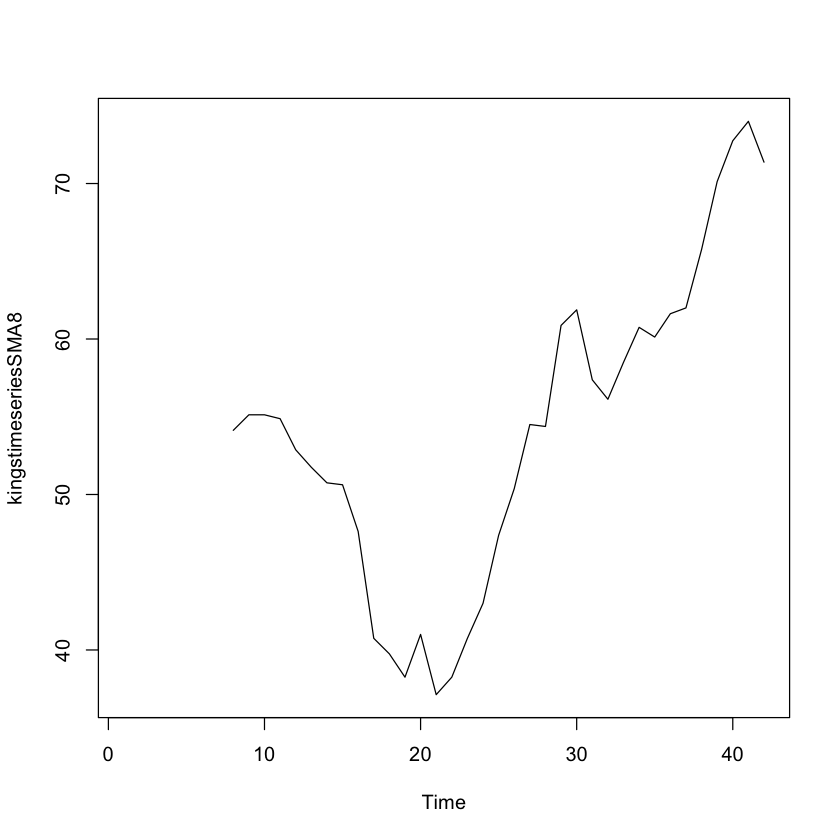

In [24]:
plot.ts(kingstimeseriesSMA8)

In [25]:
adf.test(na.omit(kingstimeseriesSMA8), alternative="stationary", k=0)

ERROR: Error in eval(expr, envir, enclos): could not find function "adf.test"


In [26]:
birthstimeseriescomponents <- decompose(birthstimeseries)

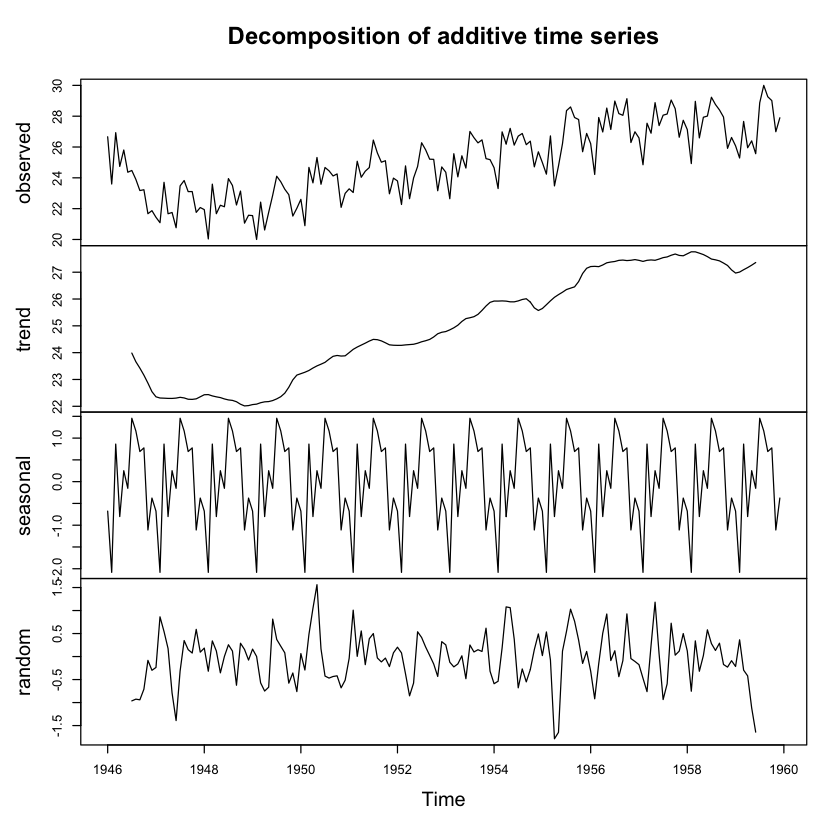

In [27]:
plot(birthstimeseriescomponents)

In [28]:
summary(birthstimeseriescomponents)

         Length Class  Mode     
x        168    ts     numeric  
seasonal 168    ts     numeric  
trend    168    ts     numeric  
random   168    ts     numeric  
figure    12    -none- numeric  
type       1    -none- character

In [29]:
birthstimeseriesseasonallyadjusted <- birthstimeseries - birthstimeseriescomponents$seasonal

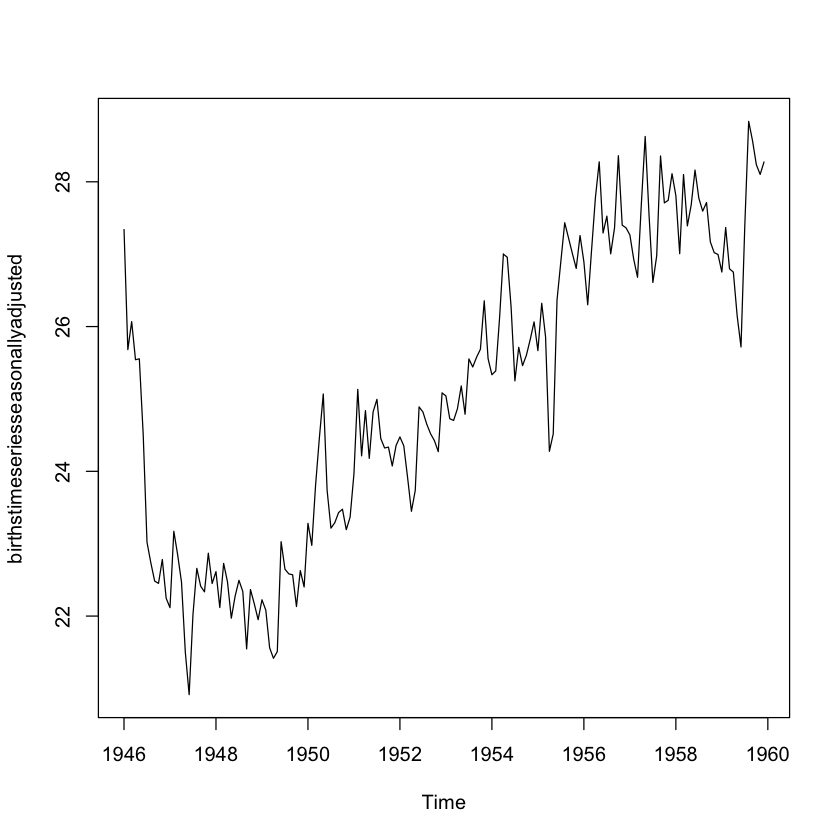

In [30]:
plot.ts(birthstimeseriesseasonallyadjusted)

#### Forecasts using Exponential Smoothing

Smoothing is controlled by the parameter alpha. The value of alpha; lies between 0 and 1. Values of alpha that are close to 0 mean that little weight is placed on the
most recent observations when making forecasts of future values.

In [31]:
rain <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)

In [32]:
rainseries <- ts(rain, start=c(1813))

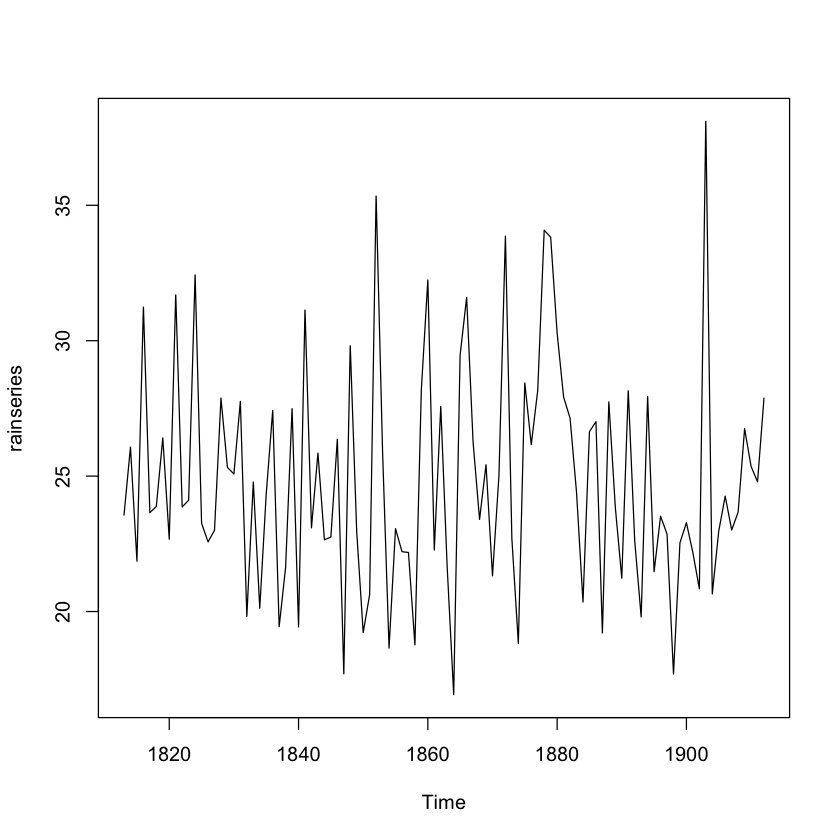

In [33]:
plot.ts(rainseries)

In [34]:
rainseriesforecasts <- HoltWinters(rainseries, beta=FALSE, gamma=FALSE)

In [35]:
rainseriesforecasts

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

In [36]:
summary(rainseriesforecasts)

             Length Class  Mode     
fitted       198    mts    numeric  
x            100    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- logical  
gamma          1    -none- logical  
coefficients   1    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           4    -none- call     

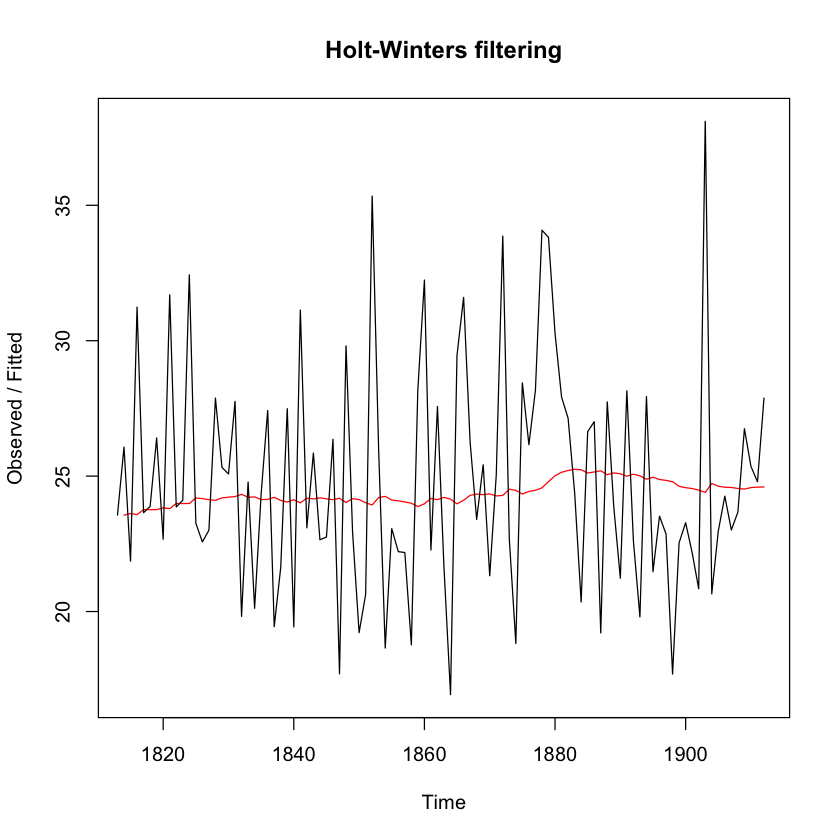

In [37]:
plot(rainseriesforecasts)

In [38]:
rainseriesforecasts$SSE

[1] 1828.855

In [39]:
HoltWinters(rainseries, beta=FALSE, gamma=FALSE, l.start=23.56)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE, l.start = 23.56)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

In [50]:
library(forecast)

In [51]:
rainseriesforecasts2 <- forecast.HoltWinters(rainseriesforecasts, h=8)

In [52]:
rainseriesforecasts2

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1913       24.67819 19.17493 30.18145 16.26169 33.09470
1914       24.67819 19.17333 30.18305 16.25924 33.09715
1915       24.67819 19.17173 30.18465 16.25679 33.09960
1916       24.67819 19.17013 30.18625 16.25434 33.10204
1917       24.67819 19.16853 30.18785 16.25190 33.10449
1918       24.67819 19.16694 30.18945 16.24945 33.10694
1919       24.67819 19.16534 30.19105 16.24701 33.10938
1920       24.67819 19.16374 30.19265 16.24456 33.11182

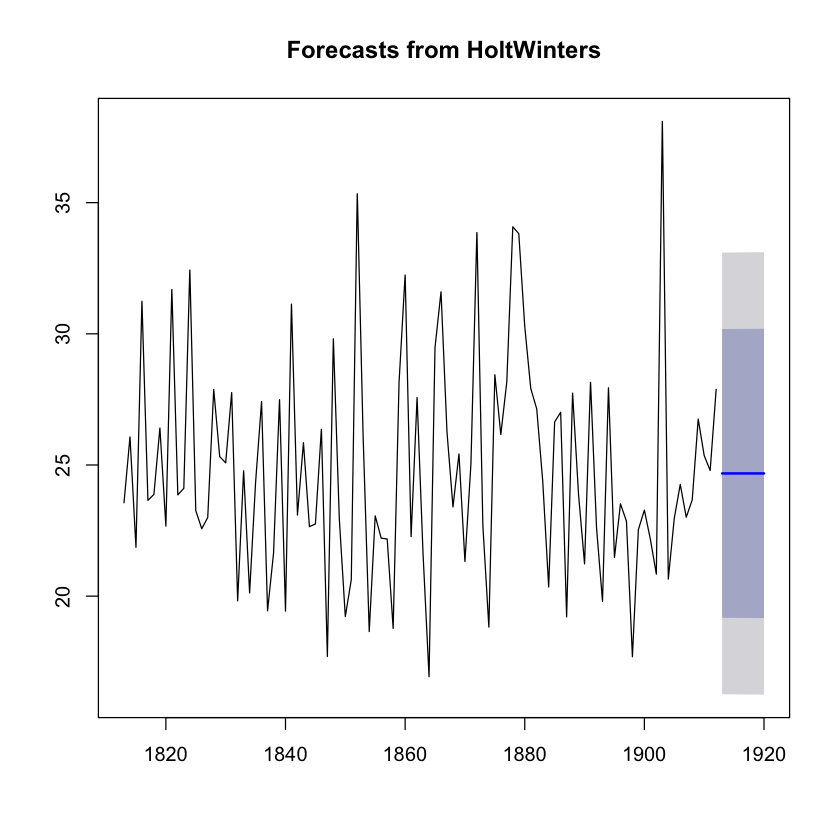

In [53]:
plot.forecast(rainseriesforecasts2)

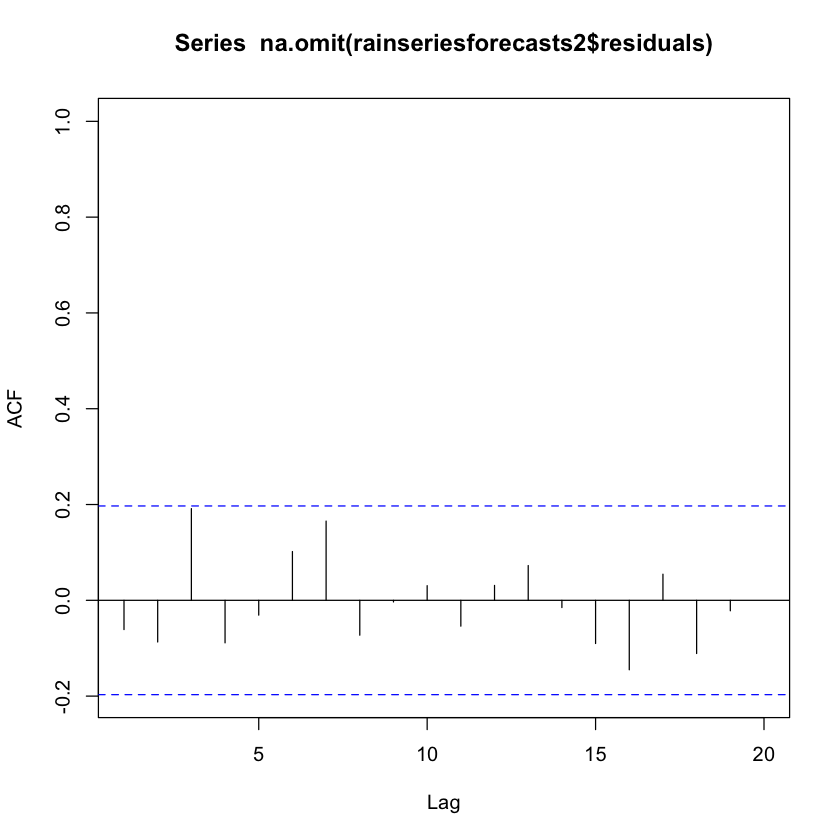

In [54]:
acf(na.omit(rainseriesforecasts2$residuals), xlim=c(1,20))

In [55]:
head(na.omit(rainseriesforecasts2$residuals))

Time Series:
Start = 1814 
End = 1819 
Frequency = 1 
[1]  2.5100000 -1.7605450  7.6619220 -0.1128951  0.1198281  2.6469377

In [56]:
head(rainseriesforecasts2$residuals)

Time Series:
Start = 1813 
End = 1818 
Frequency = 1 
[1]         NA  2.5100000 -1.7605450  7.6619220 -0.1128951  0.1198281

In [57]:
Box.test(rainseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  rainseriesforecasts2$residuals
X-squared = 17.401, df = 20, p-value = 0.6268


One important drawback of the Durbin-Watson test is that it must not be applied to models that already contain autoregressive effects.Thus, you cannot test for remaining residual autocorrelation after partially capturing it in an autoregressive model. In that scenario the power of the Durbin-Watson test can break down completely while for the Breusch-Godfrey test, for example, it does not.

In [58]:
library(lmtest,warn.conflicts = False)

In [61]:
x <- rep(c(1, -1), 50)
y1 <- 1 + x + rnorm(100)
bgtest(y1~x)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  y1 ~ x
LM test = 2.8899, df = 1, p-value = 0.08914


In [62]:
bgtest(y1~x,order=4)


	Breusch-Godfrey test for serial correlation of order up to 4

data:  y1 ~ x
LM test = 8.7455, df = 4, p-value = 0.06779


In [63]:
dwtest(y1~x)


	Durbin-Watson test

data:  y1 ~ x
DW = 2.3358, p-value = 0.9639
alternative hypothesis: true autocorrelation is greater than 0


In [64]:
y2 <- filter(y1, 0.5, method = "recursive")
         bgtest(y2 ~ x)
         bg4 <- bgtest(y2 ~ x, order = 4)
         bg4
         coeftest(bg4)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  y2 ~ x
LM test = 11.225, df = 1, p-value = 0.0008069



	Breusch-Godfrey test for serial correlation of order up to 4

data:  y2 ~ x
LM test = 15.947, df = 4, p-value = 0.003091



z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.0040508  0.0998554  0.0406 0.967641   
x             0.0045326  0.0998732  0.0454 0.963802   
lag(resid)_1  0.3115397  0.1005937  3.0970 0.001955 **
lag(resid)_2  0.0730941  0.1061841  0.6884 0.491219   
lag(resid)_3  0.0282666  0.1066638  0.2650 0.791005   
lag(resid)_4 -0.2250956  0.1022756 -2.2009 0.027745 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
